In [87]:
from pathlib import Path
import yaml
import numpy as np
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
from matplotlib import pyplot as plt
from matplotlib.colors import PowerNorm
import seaborn as sns
import cmasher as cmr

import mes_longslit as mes

In [102]:
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [2]:
sns.set_context("talk")

In [3]:
c0 = SkyCoord("21 14 20.03 +43 41 36.0", unit=(u.hourangle, u.deg))
c0.ra.deg, c0.dec.deg

(318.58345833333334, 43.69333333333333)

/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid

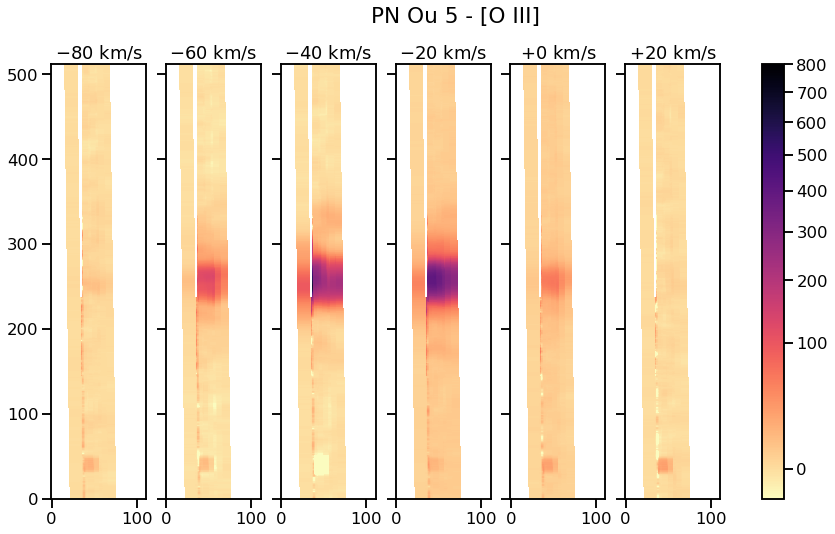

In [31]:
fig, axes = plt.subplots(
    1, 6, 
    figsize=(15, 8), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip([-80, -60, -40, -20, 0, 20], axes):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="oiii",
    )
    hdu = hdulist["scaled"]
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-4.0, vmax=800.0), 
        cmap="magma_r",
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - [O III]")
fig.colorbar(im, ax=axes)

/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid

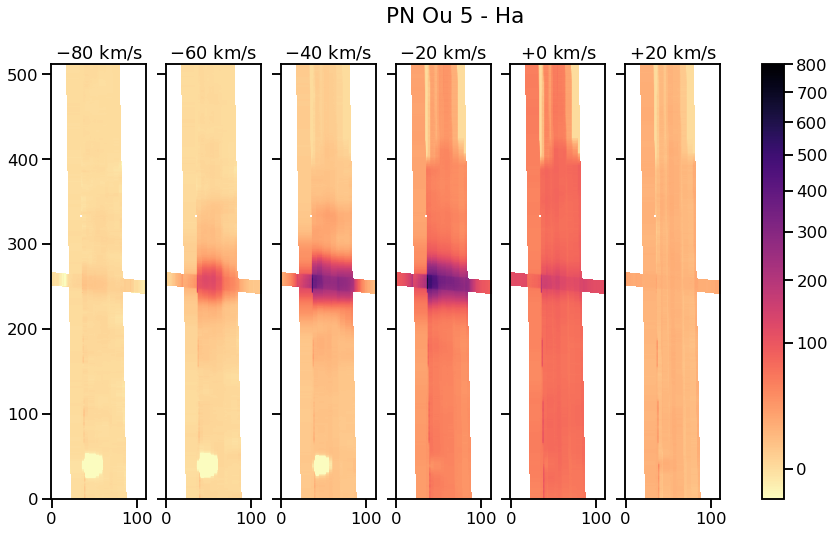

In [32]:
fig = plt.figure(figsize=(15, 8),)
axes = []
for j, v0 in enumerate([-80, -60, -40, -20, 0, 20]):
    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="ha",
    )
    hdu = hdulist["scaled"]
    ax = fig.add_subplot(1, 6, j + 1, 
                         sharex=axes[0] if axes else None,
                         sharey=axes[0] if axes else None,
                         # projection=WCS(hdu.header),
                        )
    axes.append(ax)
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-4.0, vmax=800), 
        cmap="magma_r",
        origin="lower",
    )
    if j > 0:
        ax.tick_params(axis="y", labelleft=False)
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - Ha")
fig.colorbar(im, ax=axes)

It looks like there might be a flux calibration problem with one of the slits, which is the second from the left. 

/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid

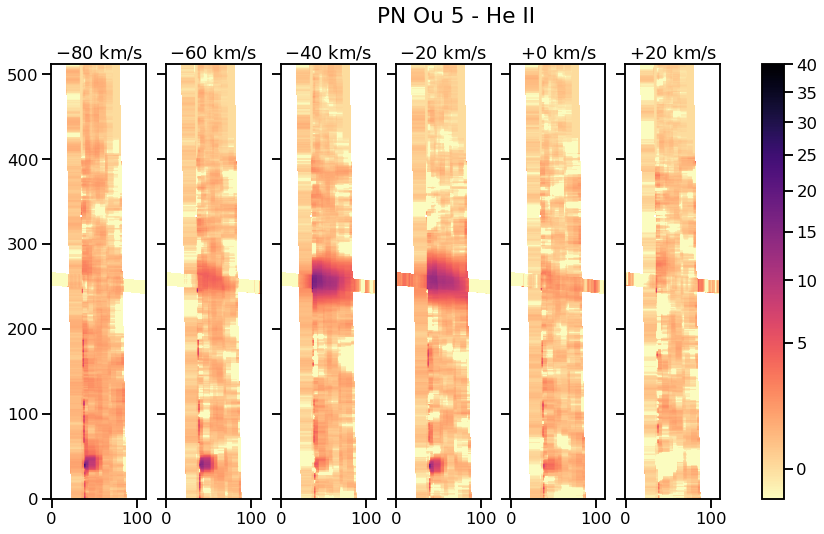

In [36]:
fig, axes = plt.subplots(
    1, 6, 
    figsize=(15, 8), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip([-80, -60, -40, -20, 0, 20], axes):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="heii",
    )
    hdu = hdulist["scaled"]
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-0.2, vmax=40.0), 
        cmap="magma_r",
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - He II")
fig.colorbar(im, ax=axes)

/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid

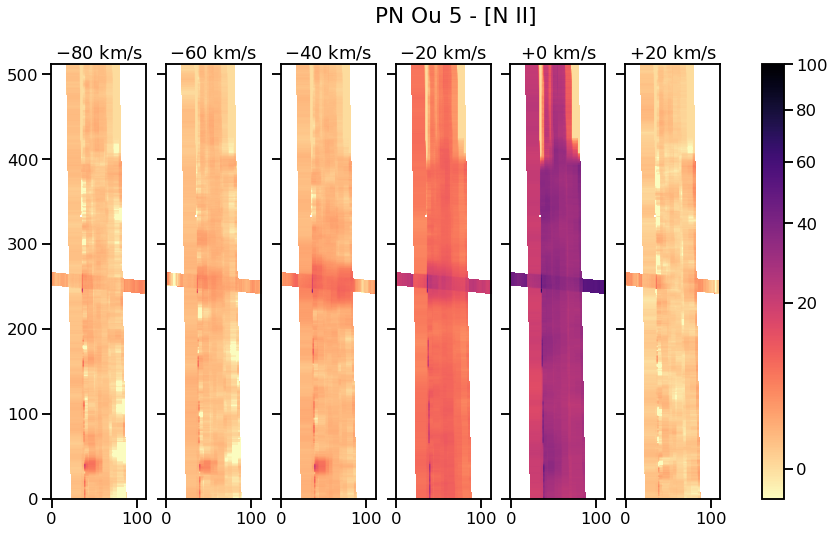

In [38]:
fig, axes = plt.subplots(
    1, 6, 
    figsize=(15, 8), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip([-80, -60, -40, -20, 0, 20], axes):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="nii",
    )
    hdu = hdulist["scaled"]
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-0.5, vmax=100.0), 
        cmap="magma_r",
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - [N II]")
fig.colorbar(im, ax=axes)

/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid value encountered in true_divide
  header=w.to_header(), data=outimage / outweights, name="scaled"
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/mes_longslit/spectral_map.py:209: RuntimeWarning: invalid

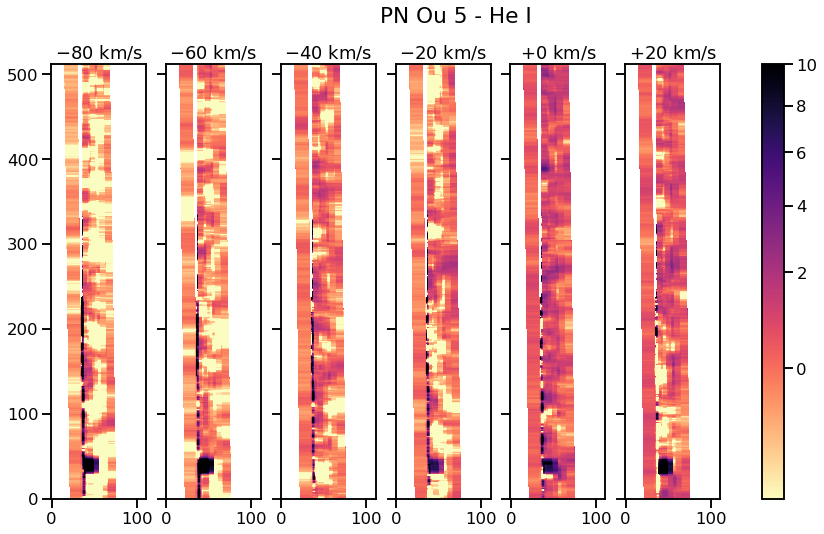

In [40]:
fig, axes = plt.subplots(
    1, 6, 
    figsize=(15, 8), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip([-80, -60, -40, -20, 0, 20], axes):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=20.0, line_id="hei",
    )
    hdu = hdulist["scaled"]
    im = ax.imshow(
        hdu.data[:, 200:-200], 
        norm=PowerNorm(gamma=0.5, vmin=-1, vmax=10), 
        cmap="magma_r",
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$ km/s")
fig.suptitle("PN Ou 5 - He I")
fig.colorbar(im, ax=axes)

## Fine velocity slices of 5 km/s

In [74]:
vels = np.arange(-90, 30, 5)
nv = len(vels)
vels[:nv//2] = vels[nv//2 - 1::-1]
vels, len(vels)

(array([-35, -40, -45, -50, -55, -60, -65, -70, -75, -80, -85, -90, -30,
        -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25]),
 24)

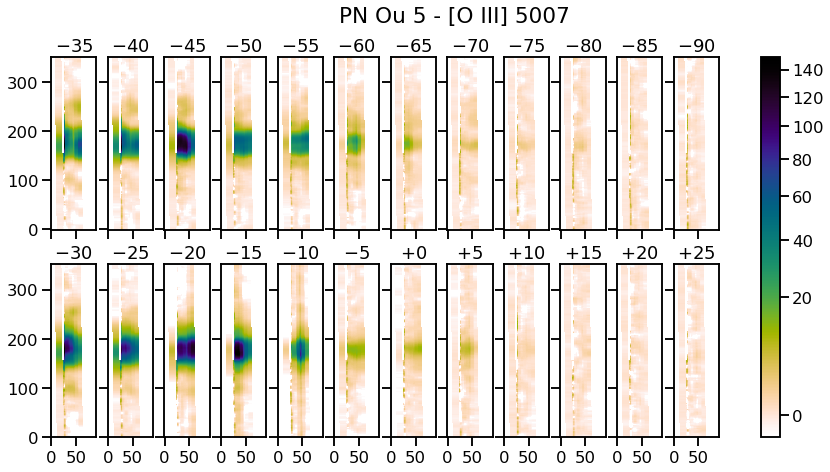

In [103]:
fig, axes = plt.subplots(
    2, 12, 
    figsize=(15, 7), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=5.0, line_id="oiii",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.5, vmax=150.0), 
        cmap=cmr.rainforest_r,
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$")
fig.suptitle("PN Ou 5 - [O III] 5007")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-oiii.jpg");

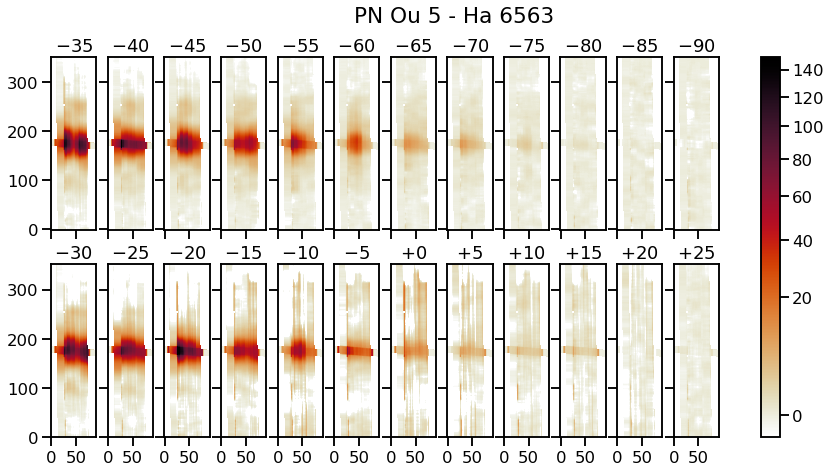

In [104]:
fig, axes = plt.subplots(
    2, 12, 
    figsize=(15, 7), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.5, dvel=5.0, line_id="ha",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data, axis=0, keepdims=True)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.5, vmax=150.0), 
        cmap=cmr.sunburst_r,
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$")
fig.suptitle("PN Ou 5 - Ha 6563")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-ha.jpg");

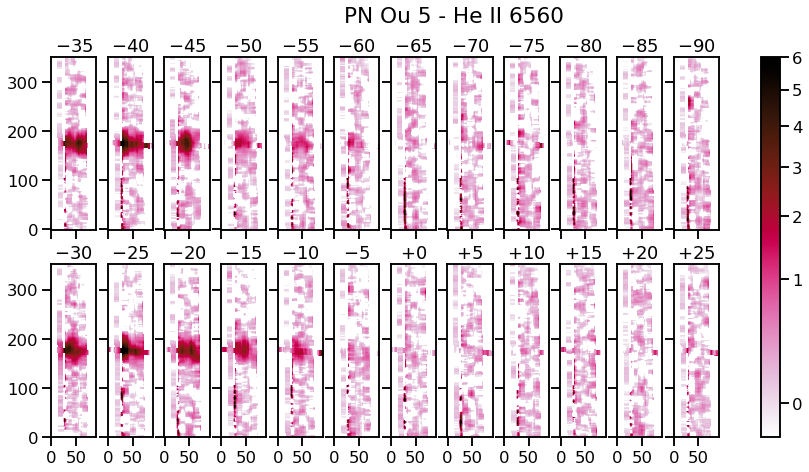

In [109]:
fig, axes = plt.subplots(
    2, 12, 
    figsize=(15, 7), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.0, dvel=5.0, line_id="heii",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.05, vmax=6.0), 
        cmap=cmr.flamingo_r,
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$")
fig.suptitle("PN Ou 5 - He II 6560")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-heii.jpg");

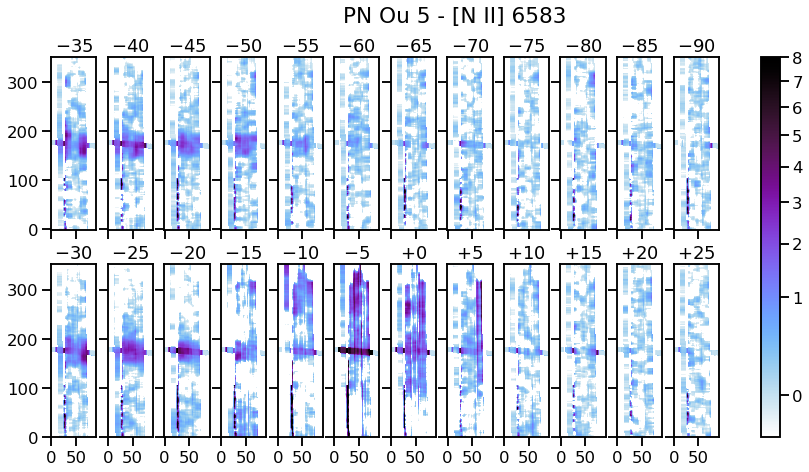

In [110]:
fig, axes = plt.subplots(
    2, 12, 
    figsize=(15, 7), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.0, dvel=5.0, line_id="nii",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data, axis=0, keepdims=True)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.1, vmax=8.0), 
        cmap=cmr.voltage_r,
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$")
fig.suptitle("PN Ou 5 - [N II] 6583")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-nii.jpg");

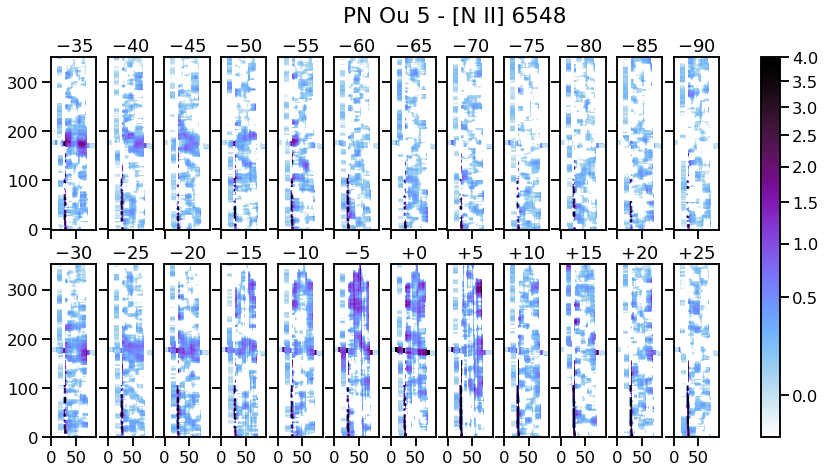

In [111]:
fig, axes = plt.subplots(
    2, 12, 
    figsize=(15, 7), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.0, dvel=5.0, line_id="nii_s",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data, axis=0, keepdims=True)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.05, vmax=4.0), 
        cmap=cmr.voltage_r,
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$")
fig.suptitle("PN Ou 5 - [N II] 6548")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-nii_s.jpg");

/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/will/miniconda3/envs/pn-ou5/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ure

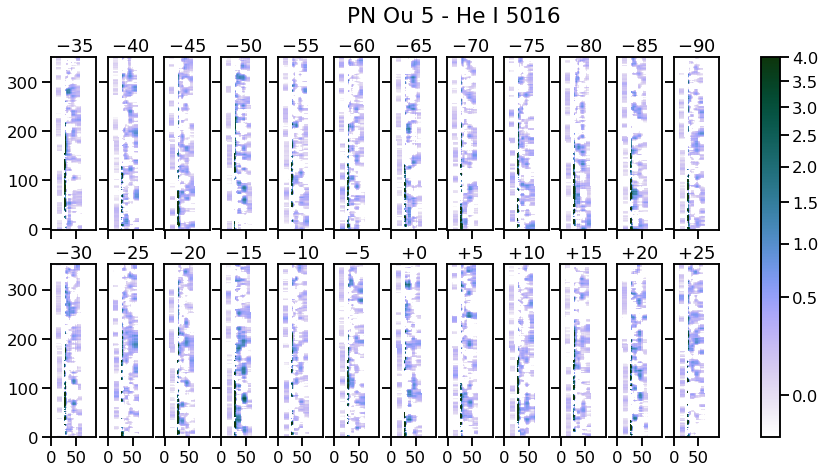

In [112]:
fig, axes = plt.subplots(
    2, 12, 
    figsize=(15, 7), 
    sharex=True,
    sharey=True,
    #subplot_kw=dict(projection=w)
)

for v0, ax in zip(vels, axes.flat):

    hdulist = mes.make_vmap(
        v0, c0.ra.deg, c0.dec.deg, slit_width_scale=2.0, dvel=5.0, line_id="hei",
    )
    hdu = hdulist["scaled"]
    hdu.data -= np.nanmedian(hdu.data, axis=0, keepdims=True)
    im = ax.imshow(
        hdu.data[80:-80, 210:-210], 
        norm=PowerNorm(gamma=0.5, vmin=-0.05, vmax=4.0), 
        cmap=cmr.horizon_r,
        origin="lower",
    )
    ax.set_title(fr"${v0:+d}$")
fig.suptitle("PN Ou 5 - He I 5016")
fig.colorbar(im, ax=axes)
fig.savefig("pn-ou5-isovel-hei.jpg");